# One-dimensional

In [329]:
import numpy as np
import math
import matplotlib.pyplot as plt

EPS = 0.001
MAX_ITER = 20

## Graphics

In [330]:
def f1(x):
    return x**3

def f2(x):
    return math.fabs(x - 0.2)

def f3(x):
    return x * math.sin(1 / x)

In [331]:
def plot_func(function, left, right, name=""):
    d = 0.001
    X = np.arange(left, right, d)
    Y = [function(x) for x in X]
    fig, ax = plt.subplots()
    ax.set_ylabel(name, rotation=0, labelpad=20)
    ax.set_xlabel('X')
    plt.plot(X, Y)
    plt.show()

In [332]:
functions = {
    r'$x^{3}$': (f1, 0, 1),
    '|x - 0.2|': (f2, 0, 1),
    r'$x * sin(\frac{1}{x})$': (f3, 0.01, 1)
}

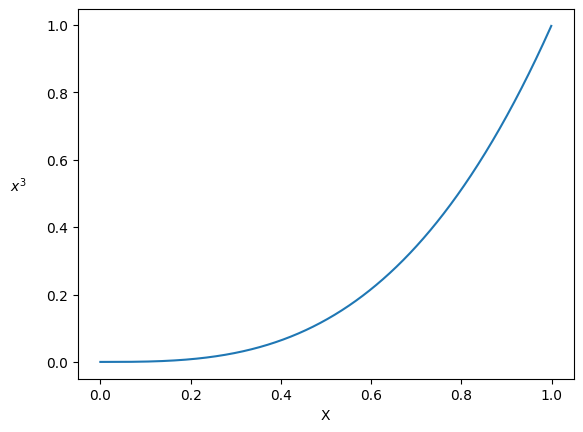

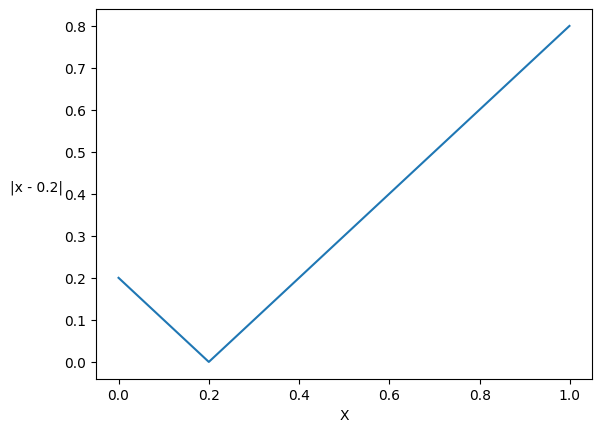

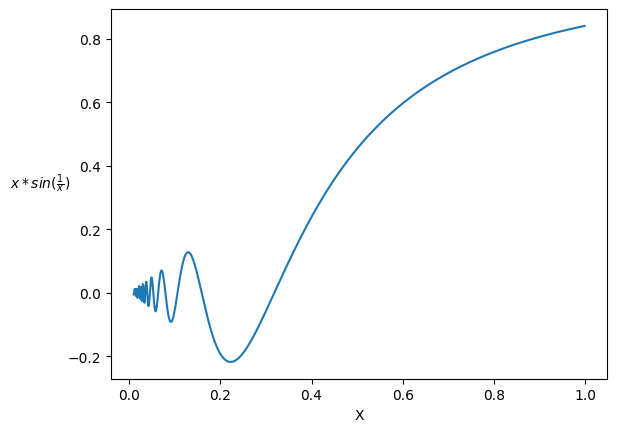

In [333]:
plot_func(f1, 0, 1, r'$x^{3}$')
plot_func(f2, 0, 1, '|x - 0.2|')
plot_func(f3, 0.01, 1, r'$x * sin(\frac{1}{x})$')

## Algorithms

### Dichotomy

In [334]:
def dichotomy(function, left, right, eps=EPS, max_iter=MAX_ITER):
    algo_dict = {
        'steps': [],
        'count_of_calc': 0
    }
    iterations = 0
    while math.fabs(right - left) > eps and iterations < max_iter:
        iterations += 1
        x = (left + right) / 2
        algo_dict['steps'].append(x)

        if function(x - eps) > function(x + eps):
            left = x
        else:
            right = x

        algo_dict['count_of_calc'] += 2

    algo_dict['iterations'] = iterations

    x = (left + right) / 2
    algo_dict['steps'].append(x)
    return x, algo_dict

### Golden section search

In [335]:
def golden_section_search(function, left, right, eps=EPS, max_iter=MAX_ITER):
    algo_dict = {
        'steps': [],
        'count_of_calc': 0
    }

    gr = (math.sqrt(5) + 1) / 2

    c = right - (right - left) / gr
    d = left + (right - left) / gr

    iterations = 0

    while math.fabs(left - right) > eps and iterations < max_iter:
        if function(c) < function(d):
            right = d
        else:
            left = c

        c = right - (right - left) / gr
        d = left + (right - left) / gr

        algo_dict['count_of_calc'] += 2
        iterations += 1
        algo_dict['steps'].append((right, left))

    algo_dict['iterations'] = iterations
    return (right + left) / 2, algo_dict


### Brut-force

In [336]:
def exhaustive_search(function, left, right, eps=EPS):
    algo_dict = {
        'steps': [],
        'count_of_calc': 0
    }

    arg_min = left
    min_f = function(left)
    iterations = 1
    algo_dict['count_of_calc'] += 1

    for x in np.arange(start=left + eps, stop=right + eps, step=eps):
        current_f = function(x)
        if current_f < min_f:
            arg_min = x
            min_f = current_f
            algo_dict['steps'].append(x)

        iterations += 1
        algo_dict['count_of_calc'] += 1

    algo_dict['iterations'] = iterations
    return arg_min, algo_dict

## Comparison

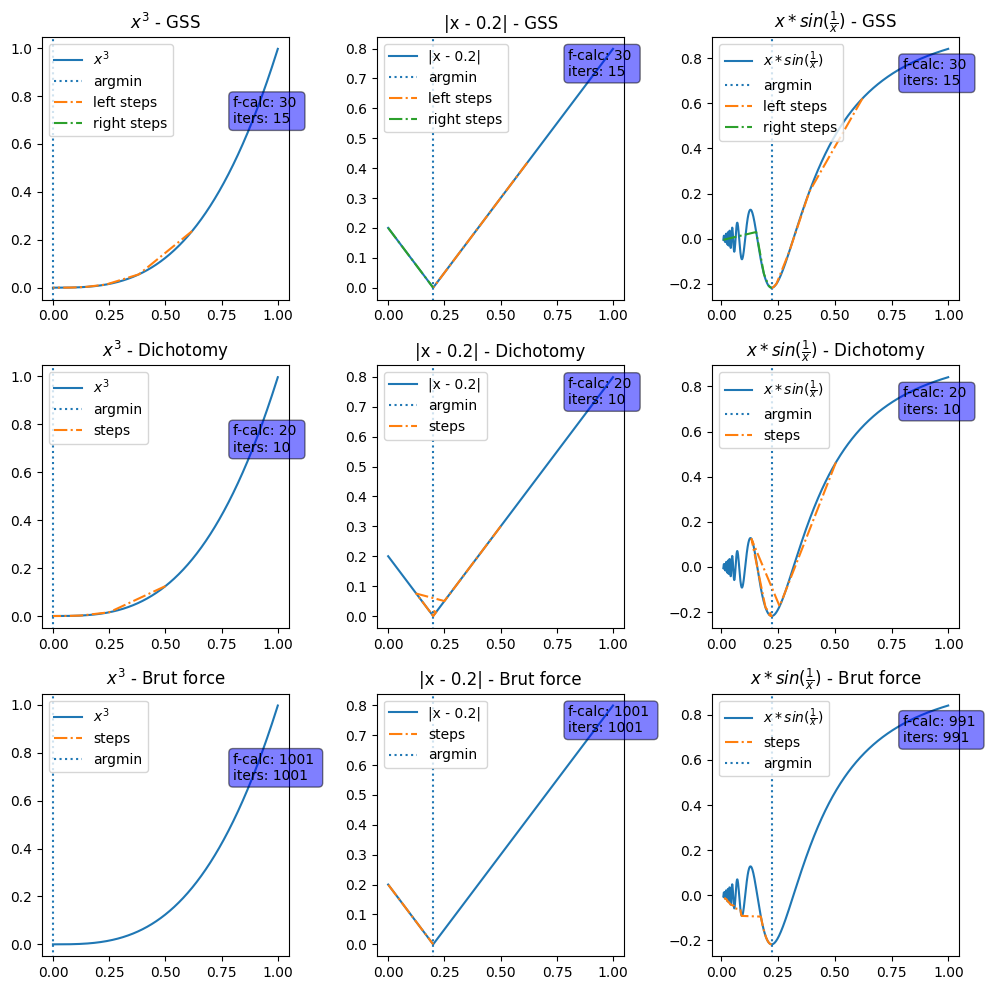

In [337]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10), tight_layout=True)
props = dict(boxstyle='round', facecolor='blue', alpha=0.5)

for index, func_name in enumerate(functions):
    ax[0, index].plot(
        np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS),
        [functions[func_name][0](x) for x in np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS)],
        label=func_name
    )
    ax[0, index].set_title(f'{func_name} - GSS')
    min_gss, gss_dict = golden_section_search(*functions[func_name])
    ax[0, index].axvline(min_gss, -0.3, 1, ls=':', label='argmin')

    ax[0, index].plot(
        [point[0] for point in gss_dict['steps']],
        [functions[func_name][0](point[0]) for point in gss_dict['steps']],
        ls='dashdot',
        label='left steps'
    )
    ax[0, index].plot(
        [point[1] for point in gss_dict['steps']],
        [functions[func_name][0](point[1]) for point in gss_dict['steps']],
        ls='dashdot',
        label='right steps'
    )
    ax[0, index].legend(loc="upper left")
    ax[0, index].text(
        0.8, 0.8,
        f'f-calc: {gss_dict["count_of_calc"]} \niters: {gss_dict["iterations"]}',
        verticalalignment='top', bbox=props
    )

    ax[1, index].plot(
        np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS),
        [functions[func_name][0](x) for x in np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS)],
        label=func_name
    )
    ax[1, index].set_title(f'{func_name} - Dichotomy')
    min_dich, dich_dict = dichotomy(*functions[func_name])
    ax[1, index].axvline(min_dich, -0.3, 1, ls=':', label='argmin')

    ax[1, index].plot(
        [point for point in dich_dict['steps']],
        [functions[func_name][0](point) for point in dich_dict['steps']],
        ls='dashdot',
        label='steps'
    )
    ax[1, index].legend(loc="upper left")
    ax[1, index].text(
        0.8, 0.8,
        f'f-calc: {dich_dict["count_of_calc"]} \niters: {dich_dict["iterations"]}',
        verticalalignment='top', bbox=props
    )
    ax[2, index].plot(
        np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS),
        [functions[func_name][0](x) for x in np.arange(start=functions[func_name][1], stop=functions[func_name][2], step=EPS)],
        label=func_name
    )
    ax[2, index].set_title(f'{func_name} - Brut force')
    min_brut, brut_dict = exhaustive_search(*functions[func_name])
    ax[2, index].plot(
        [point for point in brut_dict['steps']],
        [functions[func_name][0](point) for point in brut_dict['steps']],
        ls='dashdot',
        label='steps'
    )
    ax[2, index].axvline(min_brut, -0.3, 1, ls=':', label='argmin')
    ax[2, index].text(
        0.8, 0.8,
        f'f-calc: {brut_dict["count_of_calc"]} \niters: {brut_dict["iterations"]}',
        verticalalignment='top', bbox=props
    )
    ax[2, index].legend(loc="upper left")

fig.savefig('./figures/one-dimensional.png')

# Two-dimensional

## Generate values

In [338]:
import random
import scipy

K = 100

In [339]:
def generate_values():
    alpha = random.random()
    beta = random.random()
    print(f'alpha - {alpha}')
    print(f'beta - {beta}')

    k_array = np.random.normal(0, 1, K)
    array = np.empty(K)
    for i in range(K):
        array[i] = i / K

    return array * alpha + beta + k_array, array, alpha, beta


In [340]:
def line(x, alpha, beta):
    return x * alpha + beta

alpha - 0.9793571288417429
beta - 0.7956014811550717


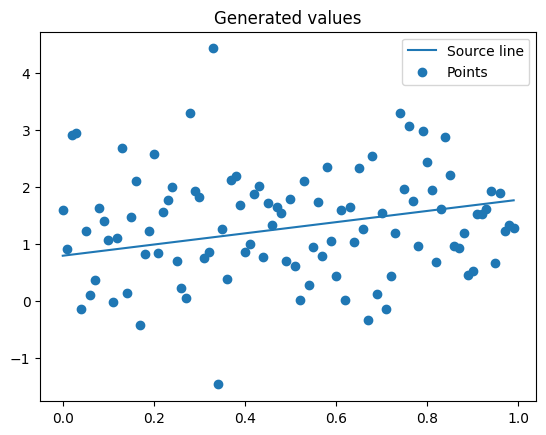

In [341]:
values, x_points, alpha, beta = generate_values()

plt.plot(x_points, [line(x, alpha, beta) for x in x_points], label='Source line')
plt.scatter(x_points, values, label='Points')
plt.title("Generated values")
plt.legend()
plt.show()

## Algorithms

In [342]:
def loss(point, func, x_points=x_points, y_points=values):
    return np.sum((func(x_points, point[0], point[1]) - y_points) ** 2)


### Brut-force

In [343]:
def exhaustive_search_2(function, args, eps=EPS, x_bounds=(0, 1), y_bounds=(0, 1)):
    return scipy.optimize.brute(
        function,
        ranges=(slice(x_bounds[0], x_bounds[1], eps), (slice(y_bounds[0], y_bounds[1], eps))),
        args=(args, )
    )

### Gauss

In [344]:
def gauss_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='CG',
        args=args
    )

### Nelder-Mead

In [345]:
def neldermead_search(function, args):
    return scipy.optimize.minimize(
        function,
        x0=[0, 0],
        bounds=[(0, 1), (0, 1)],
        method='Nelder-Mead',
        args=args
    )

## Linear approximation

In [346]:
def linear(x, a ,b):
    return a * x + b

In [347]:
brut_points = exhaustive_search_2(loss, linear)
neldermead_points = (neldermead_search(loss, linear)).x
gauss_points = (gauss_search(loss, linear)).x

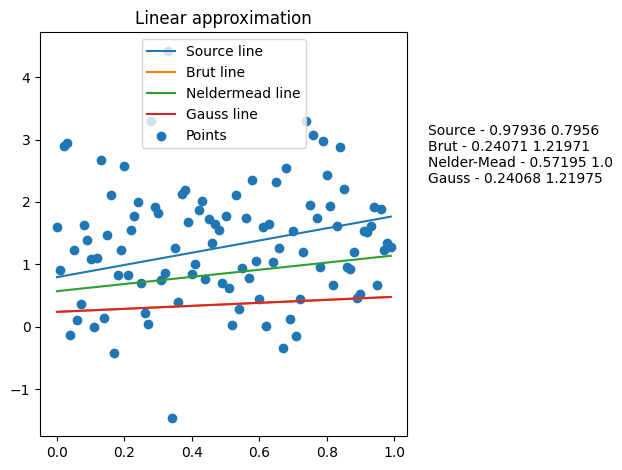

In [348]:
plt.plot(x_points, [line(x, alpha, beta) for x in x_points], label='Source line')
plt.plot(x_points, [line(x, brut_points[0], brut_points[0]) for x in x_points], label='Brut line')
plt.plot(x_points, [line(x, neldermead_points[0], neldermead_points[0]) for x in x_points], label='Neldermead line')
plt.plot(x_points, [line(x, gauss_points[0], gauss_points[0]) for x in x_points], label='Gauss line')
plt.scatter(x_points, values, label='Points')
plt.title("Linear approximation")
plt.text(1.1, 2.3, f"Source - {round(alpha, 5)} {round(beta, 5)} \n"
                   f"Brut - {round(brut_points[0], 5)} {round(brut_points[1], 5)}\n"
                   f"Nelder-Mead - {round(neldermead_points[0], 5)} {round(neldermead_points[1], 5)}\n"
                   f"Gauss - {round(gauss_points[0], 5)} {round(gauss_points[1], 5)}"
         )
plt.legend()
plt.tight_layout()
plt.savefig('./figures/linear-approximation.png')
plt.show()

## Rational approximation

In [349]:
def rational(x, a, b):
    return a / (1 + b * x)

In [350]:
brut_points = exhaustive_search_2(loss, rational)
neldermead_points = (neldermead_search(loss, rational)).x
gauss_points = (gauss_search(loss, rational)).x

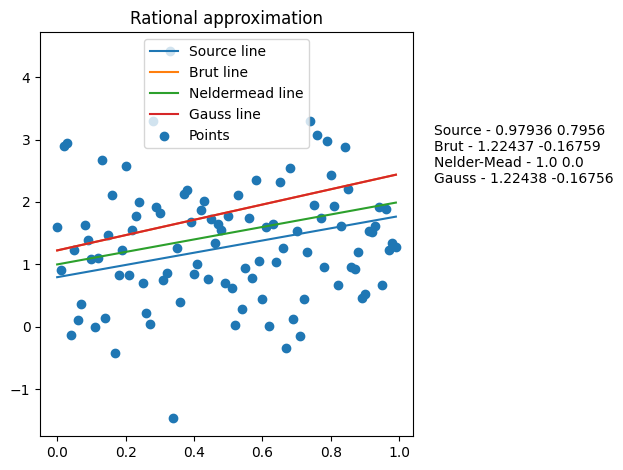

In [351]:

plt.plot(x_points, [line(x, alpha, beta) for x in x_points], label='Source line')
plt.plot(x_points, [line(x, brut_points[0], brut_points[0]) for x in x_points], label='Brut line')
plt.plot(x_points, [line(x, neldermead_points[0], neldermead_points[0]) for x in x_points], label='Neldermead line')
plt.plot(x_points, [line(x, gauss_points[0], gauss_points[0]) for x in x_points], label='Gauss line')
plt.scatter(x_points, values, label='Points')
plt.title("Rational approximation")
plt.text(1.1, 2.3, f"Source - {round(alpha, 5)} {round(beta, 5)} \n"
                   f"Brut - {round(brut_points[0], 5)} {round(brut_points[1], 5)}\n"
                   f"Nelder-Mead - {round(neldermead_points[0], 5)} {round(neldermead_points[1], 5)}\n"
                   f"Gauss - {round(gauss_points[0], 5)} {round(gauss_points[1], 5)}"
         )
plt.legend()
plt.tight_layout()
plt.savefig('./figures/rational-approximation.png')
plt.show()